In [99]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import statsmodels.formula.api as sm

In [7]:
diamonds = pd.read_csv("/Volumes/Data/Daily/Hybrid/CourseWork/5206-DS/diamonds_small.csv")
type(diamonds)
diamonds.head()

pandas.core.frame.DataFrame

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


In [8]:
rows = diamonds.shape[0]
rows

53940

In [15]:
# randomly choose 2000 lines in diamonds
diamonds = diamonds.sample(n = 2000)

# check
n = diamonds.shape[0]
n

2000

In [21]:
result = sm.ols(formula="price ~ carat", data = diamonds).fit()
result.params

Intercept   -2289.709777
carat        7775.273024
dtype: float64

## Part B: how does coefficients vary

In [100]:
## resample the data
# create a list to store
betas = []

# starting value 
i = 0

# resample 1000 times
while i < 1000:
    # replacement = true
    bs_sample = diamonds.sample(n = 2000, replace = True)
    fit = sm.ols(formula = "price ~ carat", data = bs_sample).fit()
    pars = np.array(fit.params)
    betas.append(pars)
    i += 1

In [82]:
# check
len(betas)

1000

In [103]:
betas = np.array(betas).reshape(1000,2)

In [108]:
# the second column is the slope
slope = result.params[1] - betas[:,1] 

(array([3.59136658e-05, 0.00000000e+00, 7.18273316e-05, 1.07740997e-04,
        1.79568329e-04, 1.79568329e-04, 4.66877655e-04, 1.18515097e-03,
        1.07740997e-03, 1.75976962e-03, 1.93933795e-03, 2.87309326e-03,
        2.65761127e-03, 2.94492060e-03, 2.98083426e-03, 3.48362558e-03,
        2.69352494e-03, 3.19631626e-03, 2.51395661e-03, 1.83159696e-03,
        1.54428763e-03, 8.61927979e-04, 6.10532319e-04, 3.59136658e-04,
        2.15481995e-04, 1.07740997e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.59136658e-05]),
 array([-408.97413557, -381.12958176, -353.28502795, -325.44047414,
        -297.59592033, -269.75136652, -241.90681271, -214.0622589 ,
        -186.21770509, -158.37315128, -130.52859747, -102.68404367,
         -74.83948986,  -46.99493605,  -19.15038224,    8.69417157,
          36.53872538,   64.38327919,   92.227833  ,  120.07238681,
         147.91694062,  175.76149443,  203.60604824,  231.45060204,
         259.29515585,  287.13970966,  314.984

Text(0.5, 1.0, 'Boostrap Resamples')

Text(0, 0.5, 'Probability')

Text(0.5, 0, 'Original - Resampled')

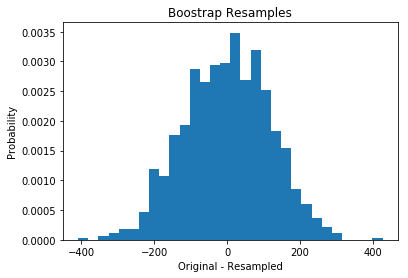

In [109]:
# plot the histogram
plt.hist(slope, bins=30, density=1)
plt.title('Boostrap Resamples')
plt.ylabel('Probability')
plt.xlabel('Original - Resampled')

In [111]:
np.std(slope)

117.72647298864686

## Part C: Bootstrap the Confidence Interval

In [121]:
## traditional boostrap intervals
Cl = 2 * result.params[1] - np.quantile(betas[:,1],0.975)
Cu = 2 * result.params[1] - np.quantile(betas[:,1],0.025)
ConfidenceInterval = [Cl,Cu]
ConfidenceInterval

[7555.689357628503, 8000.580902624841]

In [122]:
## percentile based bootstrap intervals.
Cl = np.quantile(betas[:,1],0.025)
Cu = np.quantile(betas[:,1],0.975)
ConfidenceInterval = [Cl,Cu]
ConfidenceInterval

[7549.96514609545, 7994.856691091788]